In [1]:
pip install "numpy<2" --upgrade

  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

In [3]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


C:\Users\HP\AppData\Local\Temp\ipykernel_6652\65215632.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_count.values, y=matches_count.index,palette="rainbow")


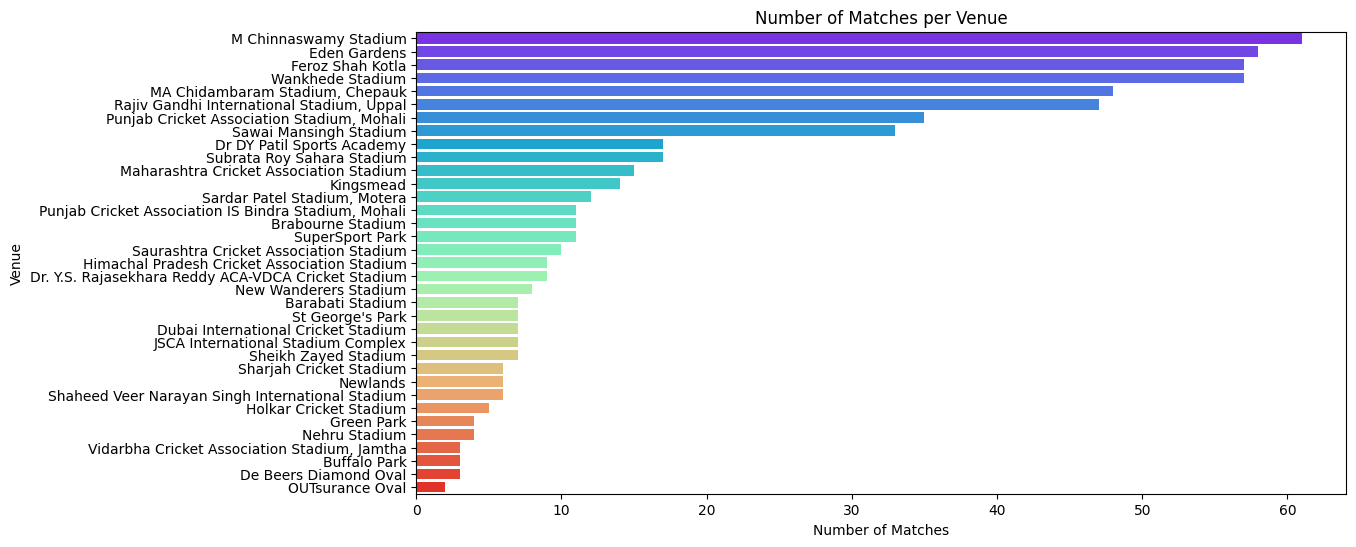

In [4]:
data = ipl.copy()
matches_per_venue = data[['mid', 'venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=matches_count.values, y=matches_count.index,palette="rainbow")
plt.title('Number of Matches per Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6652\2858948816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")


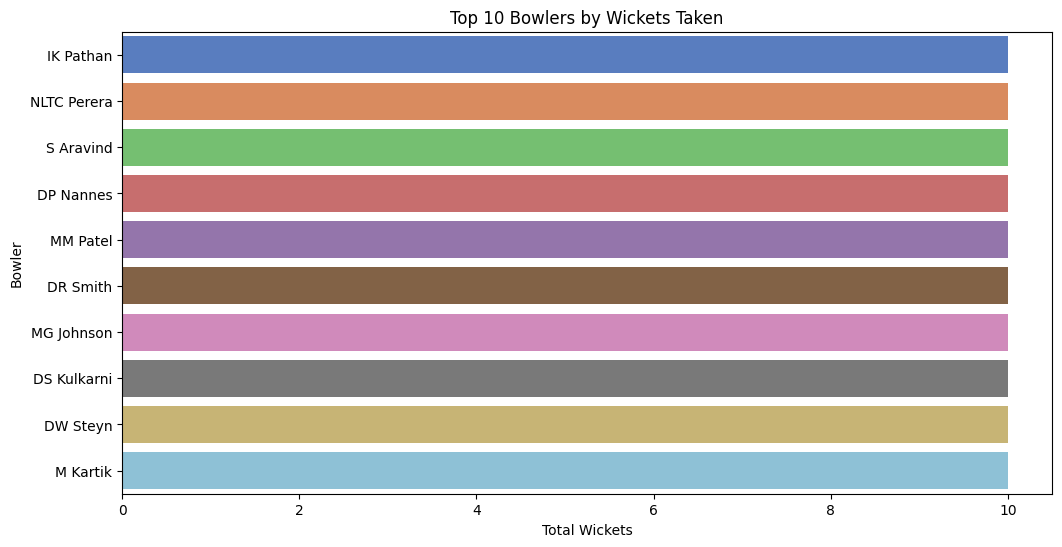

In [5]:
wickets_by_bowler = data.groupby('bowler')['wickets'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=wickets_by_bowler.values, y=wickets_by_bowler.index, palette="muted")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['bat_team', 'bowl_team', 'venue', "batsman", "bowler"]

data_encoded = data.copy()

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

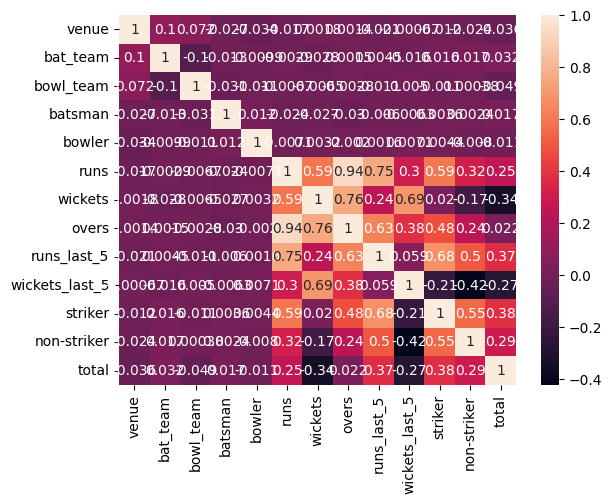

In [7]:
data_corr=data_encoded.drop(columns=["date","mid"],axis=1)
sns.heatmap(data_corr.corr(),annot=True)
plt.show()

In [8]:
feature_cols = ['bat_team', 'bowl_team', 'venue', 'runs', 'wickets', 'overs','striker','batsman','bowler']

X = data_encoded[feature_cols]
y = data_encoded['total'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dense(216, activation='relu'),  
    keras.layers.Dense(1, activation='linear') 
])

huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)

In [11]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 50.9559 - val_loss: 15.1456
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 15.2742 - val_loss: 14.4282
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 14.7299 - val_loss: 14.2519
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.6640 - val_loss: 14.2337
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 14.6418 - val_loss: 14.2572
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14.6715 - val_loss: 14.2324
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.5820 - val_loss: 14.1773
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 14.6206 - val_loss: 14.1790
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 14.5688 - val_loss: 14.2286
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14.6191 - val_loss: 14.2407


<Axes: >

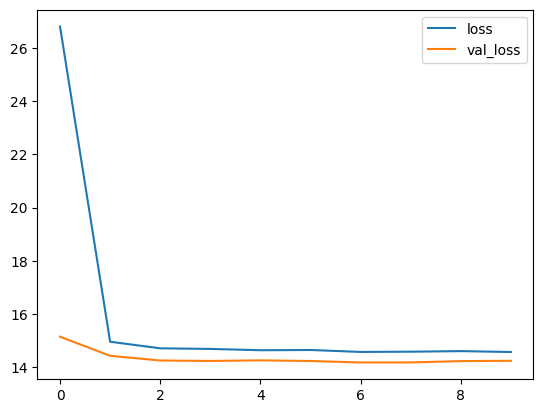

In [12]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [13]:
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


14.73159408569336

In [14]:
!pip install ipywidgets

In [15]:
import sys
!{sys.executable} -m pip install --force-reinstall ipywidgets

  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)


ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/60/97/891a0971e1e4a8c5d2b20bbe0e524dc04548d2307fee33cdeba148fd4fc7/comm-0.2.3-py3-none-any.whl.metadata (Caused by SSLError(SSLCertVerificationError("The certificate's CN name does not match the passed value.")))


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import ipywidgets
print(ipywidgets.__version__)  # Should print 8.1.7

8.1.7


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

# 1. Load and prepare data
df = pd.read_csv('ipl_data.csv')

# Select and rename columns to match our expected features
df = df.rename(columns={
    'bat_team': 'bat_team',
    'bowl_team': 'bowl_team',
    'batsman': 'batsman',
    'bowler': 'bowler',
    'striker': 'striker_ind',  # Using 'striker' column as 'striker_ind'
    'total': 'total'
})

# Select relevant features (using your actual column names)
features = ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 
            'runs', 'wickets', 'overs', 'striker_ind', 'total']

# Clean data (remove rows with missing values)
df = df[features].dropna()

# 2. Create label encoders for categorical features
label_encoders = {}
for col in ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert striker_ind to binary (0 or 1)
df['striker_ind'] = df['striker_ind'].apply(lambda x: 1 if x == df['batsman'].iloc[0] else 0)

# 3. Prepare training data
X = df.drop('total', axis=1)
y = df['total']

# 4. Create and train model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# 5. Save components
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# 6. Create interactive widgets
venue = widgets.Dropdown(options=list(label_encoders['venue'].classes_), description='Venue:')
batting_team = widgets.Dropdown(options=list(label_encoders['bat_team'].classes_), description='Batting Team:')
bowling_team = widgets.Dropdown(options=list(label_encoders['bowl_team'].classes_), description='Bowling Team:')
striker = widgets.Dropdown(options=list(label_encoders['batsman'].classes_), description='Striker:')
bowler = widgets.Dropdown(options=list(label_encoders['bowler'].classes_), description='Bowler:')

runs = widgets.IntText(value=0, description='Current Runs:')
wickets = widgets.IntText(value=0, description='Wickets:')
overs = widgets.FloatText(value=0.0, description='Overs:')
striker_ind = widgets.Dropdown(options=[('Batsman is Striker', 1), ('Batsman is Non-Striker', 0)], 
                              description='Striker Status:')
predict_button = widgets.Button(description="Predict Score")

output = widgets.Output()


for widget in [venue, batting_team, bowling_team, striker, bowler, runs, wickets, overs, striker_ind]:
    widget.style = {'description_width': 'initial'}

# 7. Prediction function
def predict_score(b):
    with output:
        clear_output()
        
        # Encode inputs
        inputs = {
            'venue': venue.value,
            'bat_team': batting_team.value,
            'bowl_team': bowling_team.value,
            'batsman': striker.value,
            'bowler': bowler.value,
            'runs': runs.value,
            'wickets': wickets.value,
            'overs': overs.value,
            'striker_ind': striker_ind.value
        }
        
        # Transform using label encoders
        encoded = []
        for col in ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']:
            encoded.append(label_encoders[col].transform([inputs[col]])[0])
        
        # Add numerical features
        encoded.extend([inputs['runs'], inputs['wickets'], inputs['overs'], inputs['striker_ind']])
        
        # Scale and predict
        X_pred = np.array(encoded).reshape(1, -1)
        X_scaled = scaler.transform(X_pred)
        prediction = model.predict(X_scaled)
        
        print(f"Predicted Total Score: {int(prediction[0])}")

predict_button.on_click(predict_score)

# 8. Display everything
display(venue, batting_team, bowling_team, 
        striker, bowler, runs, wickets, 
        overs, striker_ind, predict_button, 
        output)

Dropdown(description='Venue:', options=('Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park', 'De Beers Dia…

Dropdown(description='Batting Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', '…

Dropdown(description='Bowling Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils', '…

Dropdown(description='Striker:', options=('A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary', 'A Flinto…

Dropdown(description='Bowler:', options=('A Ashish Reddy', 'A Chandila', 'A Choudhary', 'A Flintoff', 'A Kumbl…

IntText(value=0, description='Current Runs:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Wickets:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Overs:', style=DescriptionStyle(description_width='initial'))

Dropdown(description='Striker Status:', options=(('Batsman is Striker', 1), ('Batsman is Non-Striker', 0)), st…

Button(description='Predict Score', style=ButtonStyle())

Output()